### The Microsoft Comeback

-  Authored by: Mark Njagi <br>
-  Student Pace: Part-Time <br>
-  Scheduled Project Review Date: 16th September 2023 <br>
-  Instructor Name: Faith Rotich <br>
-  Blog Post URL: <a href="https://thequestionmac.medium.com/">thequestionmac.com</a> <br>


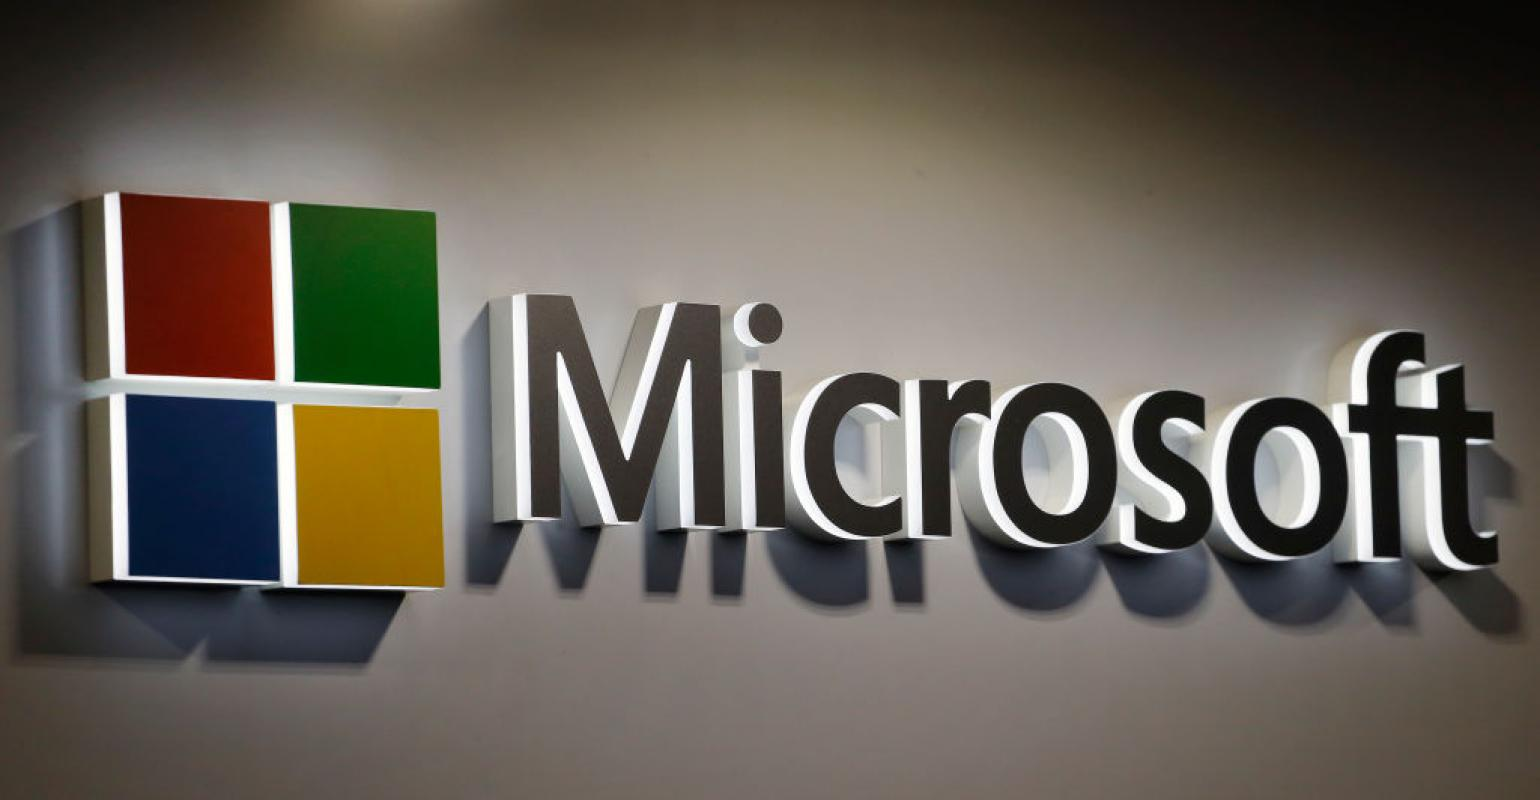

#### Overview

In this project, I undertake intensive EDA into a movies dataset to help Microsoft identify niche areas to exploit within the movie industry. The dataset used is compiled from <a href="https://developer.themoviedb.org/docs">The Movie Database API</a>. Analysis of this data reveals that although the average revenue raked in by movie studios has significantly decreased, there are still opportunities for Microsoft to exploit to make a comeback into the movie industry. The recommendations provided in this analysis are geared to help the management at Microsoft understand what steps to undertake to regain their top position as the leading movie entertainment provider in the United States.

#### Business Problem

Microsoft is an American software, services, and hardware multi-national company, best known for its market dominance and wide product range in the field of software. Notable products engineered and attributed to the software giant include Microsoft Office Suite, the Xbox 360, Microsoft Solitaire - arguably the best computer game in the 90s, and my personal favorite, the Visual Studio Code IDE. Leveraging on its global outreach and a commitment to excellence, Microsoft has been able to maintain a competitive edge over its challengers such as Google and Sony for decades. 
In the movie industry, however, Microsoft has admittedly struggled to assert its dominance. The Xbox Entertainment Studios, which once harboured Microsoft's grand ambitions to conquer the movie space in 2012, failed terribly in the two years leading to its shut down in 2014 (<a href="https://thenextweb.com/news/microsoft-closing-xbox-entertainment-studios">more information here</a>).<br>

The aim of this analysis is to draw insights that will ultimately help the company make a rebound into the industry, learn from its previous mistakes, and incorporate fresh, renewed ideas for its growth.<br>
#### Data Understanding
This analysis uses data from the Movie Database API, which is a popular, community-based database that allows users to search for historical movie and TV show details by title, genre, movie ids etc.

To access the data and perform subsequent analysis, we need to import the required libraries.

In [1]:
# To interact with the TMDb API
import json
import requests

# To read csv files
import pandas as pd
from ast import literal_eval

# To work with path files
import sys
sys.path.append('code/datacleaning')
sys.path.append('code')

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# To filter warnings
import warnings
warnings.filterwarnings('ignore')

# TMDB Credentials
from credentials import api_key

# To render matplotlib figures inside the notebook
%matplotlib inline

In [2]:
# Reading the csv file and saving the result to a variable df
df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

# To display the first five rows of our dataset
df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
print (f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 26517 rows and 10 columns


An individual explanation of each of the columns of the uncleaned dataset is as follows: 

-  __genre_ids__ - A collection of id numbers each of which is assigned to a specific genre name. for example, id 12 is mapped to the 'Adventure' genre category.

-  __id__ - a unique identifier of each movie within the dataset and API database.

-  __original_language__ - the primary language spoken in the movie's country of production.

-  __original_title__ - the original name of the movie in the language of the country of origin. The title column shows the translation of the original title to English. For example, the movie Contes de Juillet whose country of origin is France shows July Tales in the title column.

-  __popularity__ - The lifetime rating of a movie, calculated based on several factors such as number of views, number of votes for the movie, number of users who marked it as a 'favorite', as well as number of users who added the movie to their 'Watchlist'. The popularity score of a movie is calculated continuously from the date of release.

-  __release_date__ - The date on which the movie premiered.

-  __vote_average__ - The average vote of a movie, on a scale of 1 to 10, calculated as the sum of total votes received divided by the number of people who participated in the voting exercise (__vote_count__).


In [4]:
# To view a summary of our dataframe
df.info(memory_usage = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)

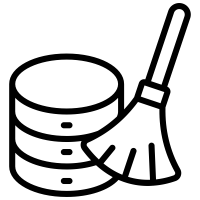

#### Data Cleaning
As illustrated above, it is evident that our dataset will have to undergo cleaning in order to transform it to a usable function. The data cleaning process is broken down into six steps:

__1. Dropping Unnecessary Columns:__ <br>
>I dropped the Unnamed column since it is repetitive and contains info from the index column. Furthermore, I dropped the original_title column and left the title column for use in my data analysis.

In [5]:
# Importing my user-defined module
import drop_unnecessary_columns as duc

In [6]:
duc.drop_unnecessary_columns(df, columns = ['Unnamed: 0', 'original_title'])

Column Unnamed: 0 dropped.
Column original_title dropped.


__2. Removing Duplicated Rows:__

In [7]:
print (f'The dataset contains {df.duplicated().sum()} number of duplicates as shown below: ')

The dataset contains 1020 number of duplicates as shown below: 


In [8]:
# To view a sample of the duplicated values
df[df.duplicated(keep = False)].sort_values(by = 'title').head(10)

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
9191,[99],95383,en,1.420,2013-01-11,$ellebrity,5.6,12
6315,[99],95383,en,1.420,2013-01-11,$ellebrity,5.6,12
20070,"[99, 36, 10770]",430364,en,0.600,2018-01-29,'85: The Greatest Team in Pro Football History,7.5,2
26340,"[99, 36, 10770]",430364,en,0.600,2018-01-29,'85: The Greatest Team in Pro Football History,7.5,2
18016,"[18, 10749]",416691,en,5.409,2017-02-10,1 Night,6.4,107
21298,"[18, 10749]",416691,en,5.409,2017-02-10,1 Night,6.4,107
11705,"[18, 10749]",253251,en,4.205,2015-07-10,"10,000 km",6.5,49
14850,"[18, 10749]",253251,en,4.205,2015-07-10,"10,000 km",6.5,49
21096,[18],334532,en,7.317,2016-06-08,100 Streets,6.2,91
17782,[18],334532,en,7.317,2016-06-08,100 Streets,6.2,91


In [9]:
# Removing duplicate values
df.drop_duplicates(keep = 'first', inplace = True)

__3. Converting the Release_Date to a datetime object in order to extract the year, month, and day of release.__

In [10]:
# Converting the release_date column to a pandas datetime object
df['release_date'] = pd.to_datetime(df['release_date'])

In [11]:
# Creating a new column year that shows the year of release
df['year'] = df['release_date'].dt.year

In [12]:
df.head()

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,year
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186,2010


__4. Retriving More Data with Join Functions:__ <br>
For our analysis, we require the production budget, runtime, and revenue earned for each movie, which was not originally in our dataset. To achieve this, I managed to find an online data set containing more data columns than the original one provided and merged it with my data on the id column.

In [13]:
lookup_df = pd.read_csv('zippedData/movies_metadata.csv') # Reading the look_up csv file

In [14]:
df = df.merge(lookup_df[['title','revenue', 'budget', 'runtime']], on = 'title', how = 'left')

In [15]:
# Dropping duplicates created as a result of the merge
df = df.drop_duplicates()

__5. Mapping Genre_ID numbers to corresponding Genre Names:__ <br>
The next step involved cleaning up the genre_ids column. The steps are broken down as follows:
-  Creating a copy of our dataset
-  Converting the genre_ids column type to list
-  Separating the genres list of ids into columns with df.explode()
-  Replacing Null Values with 'Undefined'
-  Creating a dictionary, genres_map that contains genre_ids as keys and genre_names as values
-  Mapping each element of the genres_ids column to the corresponding genre name

In [16]:
# Step 1: Creating a copy of our data
df_copy = df.copy()

In [17]:
# Step 2: Converting the genre_id type from object to list                 
df_copy['genre_ids'] = df_copy['genre_ids'].apply(literal_eval)

In [18]:
# Step 3: Using the .explode() function to separate each value of the list to a column
df_copy = df_copy.explode('genre_ids')

In [19]:
df_copy.head(10)              #viewing the first 10 rows

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,year,revenue,budget,runtime
0,12,12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,954305868.0,250000000,146.0
0,14,12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,954305868.0,250000000,146.0
0,10751,12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,954305868.0,250000000,146.0
1,14,10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,494878759.0,165000000,98.0
1,12,10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,494878759.0,165000000,98.0
1,16,10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,494878759.0,165000000,98.0
1,10751,10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,494878759.0,165000000,98.0
2,12,10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,623933331.0,200000000,124.0
2,28,10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,623933331.0,200000000,124.0
2,878,10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,623933331.0,200000000,124.0


In [20]:
# Step 4: Checking for Null Values
df_copy[df_copy['genre_ids'].isna()].head()

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,year,revenue,budget,runtime
611,NaN,31059,ru,3.867,2010-01-21,Nasha Russia: Yaytsa sudby,4.3,25,2010,22212223.0,2000000,85.0
657,NaN,151316,en,3.424,2010-12-07,Shrek’s Yule Log,4.7,9,2010,NaN,NaN,NaN
691,NaN,75828,en,3.154,2010-09-16,Erratum,6.6,7,2010,NaN,NaN,NaN
805,NaN,150782,en,2.625,2010-01-18,Bikini Frankenstein,6.0,4,2010,NaN,NaN,NaN
848,NaN,200946,en,2.451,2010-10-24,Weakness,4.5,2,2010,NaN,NaN,NaN


For the N/A values, we will fill the nulls with the string ' Genre Undefined' to categorize them together. 

In [21]:
# Replacing null values with a string
df_copy['genre_ids'] = df_copy['genre_ids'].fillna(value = 'Undefined')

In [22]:
df_copy

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,year,revenue,budget,runtime
0,12,12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,954305868.0,250000000,146.0
0,14,12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,954305868.0,250000000,146.0
0,10751,12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,954305868.0,250000000,146.0
1,14,10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,494878759.0,165000000,98.0
1,12,10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,494878759.0,165000000,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27842,10751,366854,en,0.600,2018-06-22,Trailer Made,0.0,1,2018,NaN,NaN,NaN
27842,12,366854,en,0.600,2018-06-22,Trailer Made,0.0,1,2018,NaN,NaN,NaN
27842,28,366854,en,0.600,2018-06-22,Trailer Made,0.0,1,2018,NaN,NaN,NaN
27843,53,309885,en,0.600,2018-10-05,The Church,0.0,1,2018,0.0,3500000,102.0


In [23]:
# Step 5: Creating a genre_map from the TMDb database that maps each genre_id to its genre_name
response = requests.get(f'https://api.themoviedb.org/3/genre/movie/list?api_key={api_key}')  # Retrieving the data from the API
parse_json = json.loads(response.text)   # Loading the data to a json format
results = parse_json['genres']           # Extracting the values associated with the key element 'genres'
results[0:4]                             # Displays first four items for better understanding

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'}]

In [24]:
# Next, we convert the results list to a dictionary using dictionary comprehension
genres_map = {result['id']: result['name'] for result in results}
# Additionally, we also need to create a value for the undefined genres identified in step 4
genres_map['Undefined'] = 'Undefined'

In [25]:
# Mapping the genres id to the genre names using the genres_map dictionary

In [26]:
df_copy['genres'] = df_copy['genre_ids'].map(genres_map)

Now that our dataset is fully cleaned and prepared for analysis, we can now use it to answer some different questions that will yield valuable insights for Microsoft. 

####  Question One: How much has the movie industry grown from 2000 to 2018, in terms of revenue earned?

In [27]:
# Drawing a line graph of average revenue against year

# Data Preparation
df1 = df[(df['year'] <= 2018) & (df['year'] >= 2000)]   # slices the data to include values between 2000 and 2018
df1 = df1.groupby('year')['revenue'].mean().reset_index() # groups by Year
df1['revenue in billions'] = round(df1['revenue']/1000000000, 2)

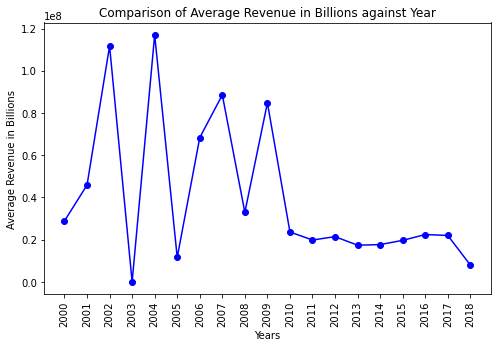

In [28]:
# Setting Parameters
x_values = df1['year']
y_values = df1['revenue']
xlabs = 'Years'
ylabs = 'Average Revenue in Billions'
title = 'Comparison of Average Revenue in Billions against Year'

plt.figure(figsize = (8,5))
plt.plot(x_values, y_values, marker = 'o', color = 'blue')
plt.xticks(ticks = x_values, rotation = 90)
plt.xlabel(xlabs)
plt.ylabel(ylabs)
plt.title(title)
plt.show()

__Comment__ <br>
Such interesting findings. The data shows an oscillation in the average consumption of movies with a slight decrease in 2018, following a growth spurt from 2013 to 2017. There is need to investigate the actual reasons behind the decrease in consumption in 2018. Next, we investigate which months have the highest amount of profits.

__Question Two: Which Months Rake in the Highest Profit Levels__

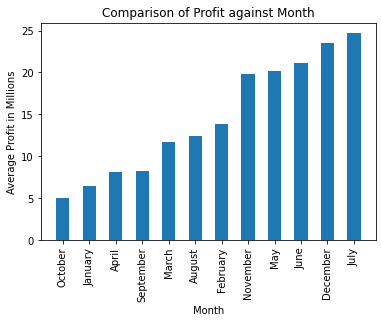

In [29]:
df2 = df.copy()  #creates a copy of the dataframe
df2['month'] = df2['release_date'].dt.month_name()    # Extracting the month name from the releasedate
df2['profit'] = df2['revenue'] - df2['budget'].astype('float64') # Feature Engineering the profit column 
df2 = df2.groupby('month')['profit'].mean().reset_index() 
df2['profit'] = round(df2['profit']/1000000, 2)
df2.sort_values(by = 'profit', inplace = True)

# Setting the graph parameters
plt.bar(x = 'month', height = 'profit', data = df2, width = 0.5)
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('Average Profit in Millions')
plt.title('Comparison of Profit against Month')
plt.show();

__Comment__ <br>
Interestingly, movies released in March and June rake in an average of 30 million USD while movies released in October rake in approximately 6 million USD.

__Recommendation__ <br>
Upon relaunching the company's new movie studio, the management at Microsoft should do so in summer months such as June to late July as evidenced by the numbers above. During such times, the company should take advantage of the fact that children are on their holidays and the favorable weather patterns allowing movie-going and recreational activities. Furthermore, Microsoft should consider releasing their blockbuster and big-budget movies during these months as there is evidenced profitability levels and therefore higher return on the company's income. Moreover, the company should consider cross--selling some of their products together to boost their profitability even higher. For example, if Microsoft schedules the release of a highly anticipated Xbox game like Halo in March, the premiere of an action-packed movie revolving around the main character's life three months later would do wonders for its popularity.<br>

During slow months and off-peak seasons such as October and September, the company should aggressively work on preparing for the next high seasons months. This can be achieved by releasing quality movie teasers, releasing rumors of upcoming highly anticipated movies to get their audiences excited before the release. The company should also incentivize movie uptake during these seasons by giving discounted offers on movie purchases. By doing so, the company will reach the audience market who are unable to afford the movies at their peak times and based on the quality of the movies, strengthen their market base.

The next question that begs to be answered while exploring the data is what movie genres customers enjoy most. Answering this question will ensure the company keeps up with upcoming trends and addresses their customers' needs.

#### Question Two: What Movie Genres do customers enjoy most?

To answer this question, we need to examine the relationship between genres and the vote rating. For this analysis, we will consider only the ratings where the number of people participating in the survey(vote count) is greater than 1000 in order to get an accurate representation of the actual audience opinion.

In [30]:
# Slicing our dataset accordingly
df_copy = df_copy[df_copy['vote_count'] > 1000]
df_copy = df_copy.groupby('genres')['vote_average'].mean().reset_index()
df_copy.sort_values(by = 'vote_average', ascending = False, inplace = True)

In [31]:
df_copy

,genres,vote_average
10,Music,7.309524
8,History,7.161224
16,War,7.120000
2,Animation,7.046957
5,Drama,6.913398
14,TV Movie,6.900000
12,Romance,6.819802
6,Family,6.801657
4,Crime,6.588764
11,Mystery,6.584962


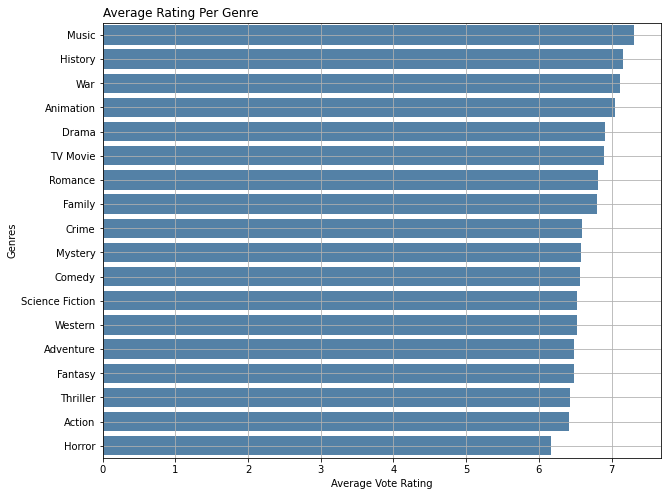

In [32]:
plt.figure(figsize = (10,8))
sns.barplot(y = df_copy.genres, x = df_copy['vote_average'], color = 'steelblue', orient = 'h', width = 0.8)
plt.grid(b = True, which = 'both', axis = 'both', linestyle = '-', linewidth = 0.8)
plt.xlabel('Average Vote Rating')
plt.ylabel('Genres')
plt.title('Average Rating Per Genre', loc = 'left', fontsize = 12)
plt.show();

As shown in the above bar chart, the top five movie genres are: history, war, animation, tv movie, and drama series. Contrary to popular assumption, most audiences do not enjoy action-packed, thriller, adventure, and horror movies as much nowadays. From this analysis, we can infer that the age of science-fiction in the early 2000s, which saw a peaked interest in science fiction and superhero genres, is now coming to an end. Additionally, the fascination has now shifted from an action genre to a more historical and early 1900s style. With several remakes of historical events such as World War II, movies such as Oppenheimer and All Quiet on the Western Front have managed to pique the attention of many. 

Microsoft should make haste to jump on to this bandwagon. Understanding the top five main themes that capture most people's attention in this era is a competitive edge that should not be left to waste. The company ought to revolve its upcoming releases around these thematic areas leaving competitors to struggle with forced action scenes and excessive CGI effects which the world is evidently moving away from. Doing so will ensure that the company positions itself as the preferred movie service provider in the oncoming years. 

#### Question Three: How Long Should Movies Last? Should there be an Ideal Sweet Spot Length of Movies?

To answer this, we need to get the median runtimes of the movies that are highly rated by audiences. For the purposes of this analysis, we'll assume that the movies that have a vote_average of greater than 7 or a popularity score of greater than 50 are most popular amongst viewers. To eliminate the risk of biased data, we have to ensure that the ratings should be an average of views from more than 500 individuals. Therefore, a sliced copy of our data based on this information is as follows:


In [33]:
df3 = df.copy()  # to make a copy of the original dataset
df3 = df3[df3['vote_count'] > 500]   # Removing biased data views
df3 = df3[(df3['vote_average'] >= 7) | (df3['popularity'] >= 50)] # Slicing our data
df3.head()

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,year,revenue,budget,runtime
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,9.543059e+08,250000000,146.0
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,4.948788e+08,165000000,98.0
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174,1995,3.735540e+08,30000000,81.0
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186,2010,8.255328e+08,160000000,148.0
6,"[28, 12, 14, 878]",19995,en,26.526,2009-12-18,Avatar,7.4,18676,2009,2.787965e+09,237000000,162.0


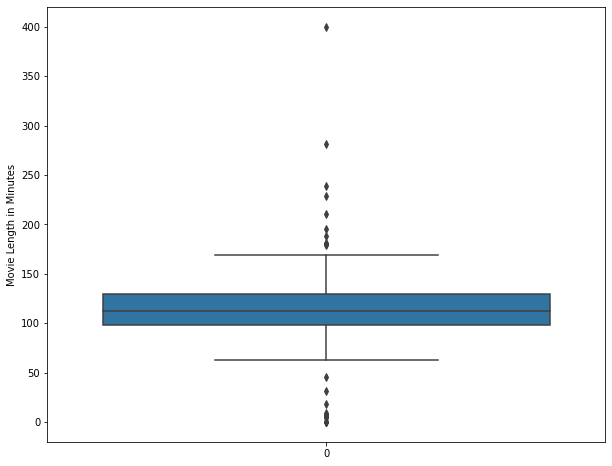

In [34]:
# Drawing a boxplot of the runtimes
plt.figure(figsize = (10,8))
sns.boxplot(data = df3['runtime'])
plt.ylabel('Movie Length in Minutes')
plt.show();

As illustrated above, the ideal length of popular movies for most individuals falls between 100 minutes to 130 minutes, i.e., between 1 hr 40 mins to 2 hrs 10 minutes. Understandably, this data does contain some outlier movies which are so good that fans do not mind sitting in for close to five hours following. Inversely, some audience members felt that some movies delivered such great quality within the first hour that they deserved to be in the popular list. This is however, the exception rather than the norm. While releasing movies, Microsoft should take into consideration the short attention span of the audience and ensure the limit of 2 hours per movie is not breached. Keeping movies within the recommended length not only leaves the fans thirsting for more but also reduces the production budget for the company. 

#### Conclusion


The analysis above revealed three major findings that Microsoft should consider when relaunching the Xbox Entertainment Studios. First, the data shows that customer's tastes and preferences change regularly. Right now, most customers may enjoy war, documentary, and historical themed movies, to which the company should get onboard with immediately. However, it is even more important for the company to stay on top of the latest trends, news, and customer discoveries which may drastically change the market direction. By consistently mining for new data analysis trends and implementing recommendation such as the ones highlighted above, the company is guaranteed to make a comeback to its rightful position. 